<a href="https://colab.research.google.com/github/kpiitj/FMnistCNN/blob/main/CNN_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist

In [ ]:
(trimg,trlab),(tsimg,tslab) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
trimg = trimg/255.0
tsimg = tsimg/255.0

In [ ]:
trimg.shape

(60000, 28, 28)

In [ ]:
trlab.shape

(60000,)

In [ ]:
tsimg.shape

(10000, 28, 28)

In [ ]:
import matplotlib.pyplot as plt
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

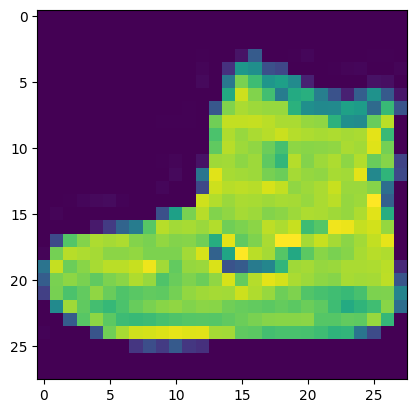

In [ ]:
plt.imshow(trimg[0])

In [ ]:
#Creating CNN

In [ ]:
input1=keras.Input(shape=(28,28,1))
x=layers.Conv2D(16,3,padding='same',activation='relu')(input1)
x=layers.MaxPooling2D()(x)
x=layers.Conv2D(32,3,padding='same',activation='relu')(x)
x=layers.MaxPooling2D()(x)
x=layers.Conv2D(64,3,padding='same',activation='relu')(x)
x=layers.MaxPooling2D()(x)
x=layers.Conv2D(128,3,padding='same',activation='relu')(x)
x=layers.MaxPooling2D()(x)
x=layers.Flatten()(x)
x=layers.Dense(128,activation='relu')(x)
x=layers.Dense(10)(x)
cnn1=keras.Model(inputs=[input1],outputs=[x])

In [ ]:
cnn1.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 14, 14, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 114,954 (449.04 KB)

 Trainable params: 114,954 (449.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn1.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
cnn1.fit(trimg,trlab,epochs=10)
test_loss,test_Acc=cnn1.evaluate(tsimg,tslab,verbose=2)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_36']
Received: inputs=Tensor(shape=(32, 28, 28))
  warnings.warn(msg)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 32ms/step - accuracy: 0.7276 - loss: 0.7313
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 30ms/step - accuracy: 0.8790 - loss: 0.3263
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9000 - loss: 0.2700
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 33ms/step - accuracy: 0.9147 - loss: 0.2330
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9235 - loss: 0.2086
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9291 - loss: 0.1908
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.9377 - loss: 0.1675
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 33ms/step - accuracy: 0.9401 - loss: 0.1559
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9460 - loss: 0.1449
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9505 - loss: 0.1306


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_36']
Received: inputs=Tensor(shape=(None, 28, 28))
  warnings.warn(msg)


313/313 - 3s - 9ms/step - accuracy: 0.9157 - loss: 0.2626
